<a href="https://colab.research.google.com/github/Ash-42/Uni-Ranking-Analysis/blob/main/Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About the data**

The *Times Higher Education (THE)* university rankings dataset from 2011 to 2016.

A world rank is designated and scores assigned between 0 and 100 for:

* Teaching (teaching/the learning environment)
* International Outlook (international/staff, students and research)
* Research (research/volume, income and reputation)
* Citations (citations/research influence)
* Industry Income (income/knowledge transfer, value not available for all)

The weight of the above factors in calculating the total score:

Teaching: 30%;
International Outlook 7.5%;
Research: 30%;
Citations: 30%;
Industry Income: 2.5%;

      total_score = 0.3*teaching + 0.075*international + 0.3*research + 0.3*citations + 0.025*income





**To do for the team :**


*Data Wrangling*
1. Clean up data - remove NaN, null, missing and '-' values
2. Create separate dataframes for each year
3. Check for typos and inconsistent capitalization (research how to do that)
*Data Visualization*
1. Create separate graphs for each dataframe(year)
2. Extract insights (look for a story)
3. Find and filter outliers <br>
<t> a) Numerical – Box plot / Histogram <br>
b) Categorical – Bar chart.



In [901]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [902]:
# Load the dataset
path = "/content/uni_rankings_dataset.csv"
data = pd.read_csv(path)

# View feature names and the top 10 instances
data.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


###Exploratory Data Analysis


In [903]:
# (instances, features)
print("Dataframe shape: ", data.shape, "\n")
print(data.info())

Dataframe shape:  (2603, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float6

#### Feature Analysis

1. `world_rank` : World rank for the university. Contains rank ranges and equal ranks (eg. =94 and 201-250)
2. `university_name` : Name of the university
3. `country` : Country of each university
4. `teaching` : University score for teaching (the learning environment)
5. `international` : University score for international outlook (students, staff, reasearch)
6. `research` : University score for research (volume, income and reputation)
7. `citations` : University score for citations (research influence)
8. `income` : University score for industry income (knowledge transfer)
9. `total_score` : Total score for university, used to determine rank
10. `num_students` : Number of students at the university
11. `student_staff_ratio` : Ratio of students to staff at the university
12. `international_students` : Percentage of students of international origin
13. `female_male_ratio` : Ratio of female students to male students in the university
14. `year` : Year of publishing rankings

#### String Processing
Convert all values to appropriate data types

In [904]:
# Data contains '-' values, assign as NaN
data.replace('-', np.NaN, inplace=True)

In [905]:
#Removing inconsistent capitalization
df = data
countries = []
for i in df['country']:
  if i not in countries:
    countries.append(i)
for i in countries:
  for j in i.split(' '):
    j.capitalize()

In [906]:
# Process world_rank
data.world_rank.value_counts().keys()

Index(['301-350', '601-800', '351-400', '276-300', '201-225', '501-600',
       '226-250', '401-500', '251-275', '201-250',
       ...
       '=193', '=125', '=144', '=104', '=161', '=172', '=88', '=176', '=56',
       '179'],
      dtype='object', length=250)

In [907]:
# Process num_students to remove commas
print("Before processing: ")
print(*data.num_students.values[:30], sep=", ")
print("\n")

# Replace commas with empty string 
data.num_students = [i.replace(',', '') if isinstance(i, str) else i for i in data.num_students.values]
# Convert from str to float, can be changed to int after data cleaning
data.num_students = [float(i) for i in data.num_students.values]

print("After processing 'num_students': ")
print(*data.num_students.values[:30], sep=", ")

Before processing: 
20,152, 2,243, 11,074, 15,596, 7,929, 18,812, 19,919, 36,186, 15,060, 11,751, 38,206, 14,221, 15,128, 21,424, 18,178, 41,786, 66,198, 25,055, 20,376, 11,885, 19,835, 26,607, 44,020, 15,172, 18,334, 26,199, 19,967, 3,055, 22,020, 50,152


After processing 'num_students': 
20152.0, 2243.0, 11074.0, 15596.0, 7929.0, 18812.0, 19919.0, 36186.0, 15060.0, 11751.0, 38206.0, 14221.0, 15128.0, 21424.0, 18178.0, 41786.0, 66198.0, 25055.0, 20376.0, 11885.0, 19835.0, 26607.0, 44020.0, 15172.0, 18334.0, 26199.0, 19967.0, 3055.0, 22020.0, 50152.0


In [908]:
# Process international_students
print("Before processing: ")
print(*data.international_students.values[:30], sep=", ")
print("\n")

# Remove percentage symbols from the 'international_students' feature
data.international_students = [i[ : -1] if isinstance(i, str) else i for i in data.international_students.values]
# Convert from str to float
data.international_students = [float(i) for i in data.international_students.values]

print("After processing 'international_students': ")
print(*data.international_students.values[:30], sep=", ")

Before processing: 
25%, 27%, 33%, 22%, 27%, 34%, 34%, 15%, 51%, 20%, 15%, 21%, 23%, 19%, 37%, 16%, 15%, 28%, 20%, 35%, 38%, 46%, 13%, 17%, 15%, 10%, 26%, 4%, 11%, 25%


After processing 'international_students': 
25.0, 27.0, 33.0, 22.0, 27.0, 34.0, 34.0, 15.0, 51.0, 20.0, 15.0, 21.0, 23.0, 19.0, 37.0, 16.0, 15.0, 28.0, 20.0, 35.0, 38.0, 46.0, 13.0, 17.0, 15.0, 10.0, 26.0, 4.0, 11.0, 25.0


In [909]:
# Process female_male_ratio 
print("Before processing: ")
print(*data.female_male_ratio.values[ : 20], sep=", ")
print("\n")

# Rename column name to female_ratio
data.rename(columns={'female_male_ratio' : 'female_ratio'}, inplace=True)

# Convert ratio to decimal flaoting values
data.female_ratio = [('0.'+i[ : 2]) if isinstance(i, str) else i for i in data.female_ratio]
data.female_ratio = [float(i) for i in data.female_ratio.values]

print("After processing 'female_ratio': ")
print(*data.female_ratio.values[ : 20], sep=", ")

Before processing: 
nan, 33 : 67, 37 : 63, 42 : 58, 45 : 55, 46 : 54, 46 : 54, 50 : 50, 37 : 63, 50 : 50, 52 : 48, 42 : 58, 50 : 50, 48 : 52, 31 : 69, 48 : 52, nan, nan, 51 : 49, 39 : 61


After processing 'female_ratio': 
nan, 0.33, 0.37, 0.42, 0.45, 0.46, 0.46, 0.5, 0.37, 0.5, 0.52, 0.42, 0.5, 0.48, 0.31, 0.48, nan, nan, 0.51, 0.39


In [910]:
# Observe year keys and number of instances each
data.year.value_counts()

2016    800
2012    402
2015    401
2013    400
2014    400
2011    200
Name: year, dtype: int64

This implies that the dataset consists of rankings from the years 2011-2016

In [911]:
def check_col_types(df):
  """Prints data types of all 
  values of every feature in a
  dataframe""" 
  for col in df.columns:
    types = set()
    for val in df[col].values:
      types.add(type(val))
    print(col, ':', *types)

check_col_types(data)

world_rank : <class 'str'>
university_name : <class 'str'>
country : <class 'str'>
teaching : <class 'numpy.float64'>
international : <class 'float'> <class 'str'>
research : <class 'numpy.float64'>
citations : <class 'numpy.float64'>
income : <class 'float'> <class 'str'>
total_score : <class 'float'> <class 'str'>
num_students : <class 'numpy.float64'>
student_staff_ratio : <class 'numpy.float64'>
international_students : <class 'numpy.float64'>
female_ratio : <class 'numpy.float64'>
year : <class 'numpy.int64'>


In [912]:
# Check what values are of type str
print('international: ', [i for i in data.international.values[:20] if isinstance(i, str)])
print('income:', [i for i in data.income.values[:20] if isinstance(i, str)])
print('total_score:', [i for i in data.total_score.values[:20] if isinstance(i, str)])

# Convert all str values to type float or int
data.international = [float(i) for i in data.international.values]
data.income = [float(i) for i in data.income.values]
data.total_score = [float(i) for i in data.total_score.values]

international:  ['72.4', '54.6', '82.3', '29.5', '70.3', '77.7', '77.2', '39.6', '90.0', '59.2', '48.1', '62.8', '58.5', '62.4', '93.7', '53.3', '90.9', '32.9', '39.1']
income: ['34.5', '83.7', '87.5', '64.3', '57.0', '73.5', '92.9', '100.0', '34.7', '59.6', '43.7', '53.7']
total_score: ['96.1', '96.0', '95.6', '94.3', '94.2', '91.2', '91.2', '91.1', '90.6', '89.5', '87.7', '86.9', '86.4', '83.9', '83.4', '83.4', '82.0', '81.0', '79.5', '79.3']


In [913]:
check_col_types(data)

world_rank : <class 'str'>
university_name : <class 'str'>
country : <class 'str'>
teaching : <class 'numpy.float64'>
international : <class 'numpy.float64'>
research : <class 'numpy.float64'>
citations : <class 'numpy.float64'>
income : <class 'numpy.float64'>
total_score : <class 'numpy.float64'>
num_students : <class 'numpy.float64'>
student_staff_ratio : <class 'numpy.float64'>
international_students : <class 'numpy.float64'>
female_ratio : <class 'numpy.float64'>
year : <class 'numpy.int64'>


In [914]:
data.head(6)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,0.33,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,0.37,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,0.42,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,27.0,0.45,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812.0,11.8,34.0,0.46,2011


####Handling Missing Values

In [915]:
# Separate categorical and numerical variables
categorical_vars = ["world_rank", "university_name", "country", "year"]
numerical_vars = ["teaching", "international", "research", "citations", "income", "total_score", "num_students", "student_staff_ratio", "international_students", "female_ratio"] 

# NaN values in categorical variables
print("Missing categorical values :")
print([data[i].isnull().sum() for i in categorical_vars])

# NaN values in numerical variables
print("Missing numerical values :")
missing_cat = [(i, data[i].isnull().sum()) for i in numerical_vars]
print(*missing_cat, sep='\n')
missing_vars = [var for (var, count) in missing_cat if count!=0]
print("\nVariables with missing values: ", *missing_vars)

Missing categorical values :
[0, 0, 0, 0]
Missing numerical values :
('teaching', 0)
('international', 9)
('research', 0)
('citations', 0)
('income', 218)
('total_score', 1402)
('num_students', 59)
('student_staff_ratio', 59)
('international_students', 67)
('female_ratio', 236)

Variables with missing values:  international income total_score num_students student_staff_ratio international_students female_ratio


Check for outliers in each variable to determine the best central tendancy measure as replacement for missing values

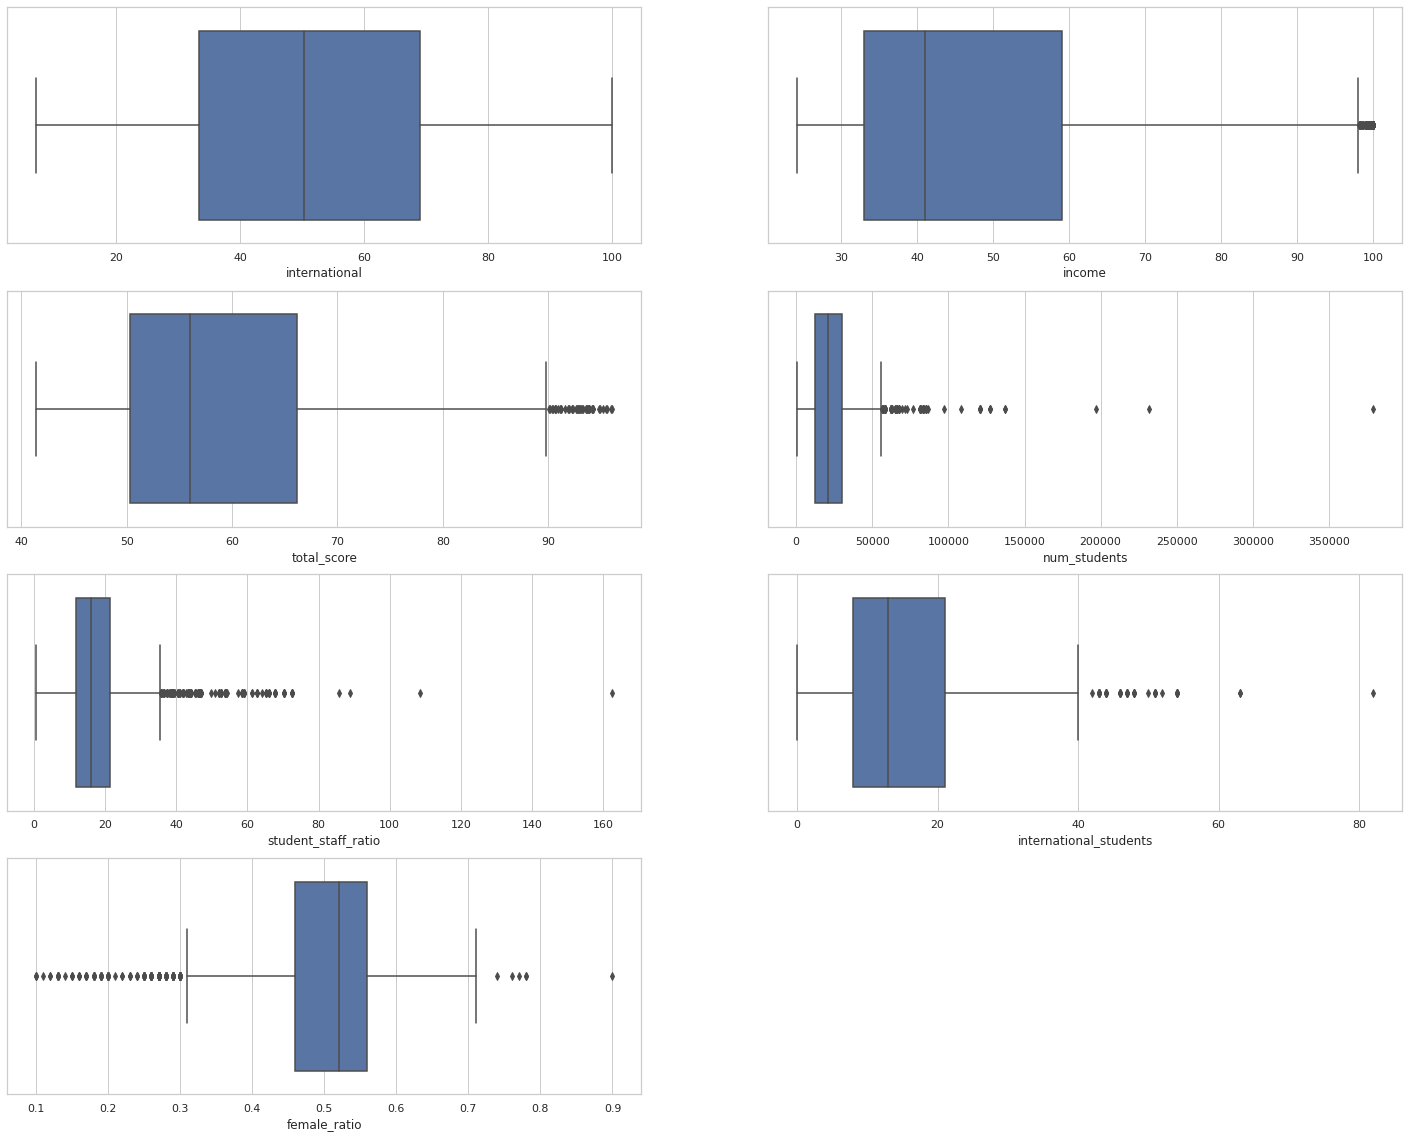

In [916]:
# Boxplots for numerical variables
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25, 20))

for i, col in enumerate(missing_vars, 1):
  plt.subplot(4, 2, i)
  ax = sns.boxplot(x=data[col])

`international` has only 9 missing values and has a relatively symmetric distribution about the mean. Therefore, we decide to fill in missing values with the previous value to maintain the shape of the distribution.

In [917]:
# Fill NaN in international with previous values
data['international'] = data['international'].fillna(method='ffill').fillna(method='bfill')

`num_students`,  `student_staff_ratio` and `international_students` have around 60 missing, and higly right-skewed distributions. We therefore decide to replace NaN with the median of each.

In [918]:
# Replace missing with the median value
data.num_students.fillna(data.num_students.median(), inplace=True)
data.student_staff_ratio.fillna(data.student_staff_ratio.median(), inplace=True)
data.international_students.fillna(data.international_students.median(), inplace=True)

# Convert float to int now that NaN values are removed
data.num_students = [int(i) for i in data.num_students]

Both `female_ratio` and `income` have around 200 missing values. That is nearly 10% of all the instances, and the distribution is still skewed with huge outliers. Since the dataframe is ordered according to rank, we decide to impute the missing score values with the previous or next values in the feature column.

In [919]:
# Replace missing values with neighbouring values
data.female_ratio = data.female_ratio.fillna(method='ffill').fillna(method='bfill')
data.income = data.income.fillna(method='ffill').fillna(method='bfill')

Over 54% of total_score is missing. Intuitively, `total_score` and `world_rank` establish the same correlation. Therefore, we decide to calculate the `total_score` values using the weightage method of designation of the overall score using the other scores in the dataset by the *THE*.

In [920]:
# Replace total_score with transformation on the other score features, no resulting NaN values
data.total_score = 0.3*data.teaching + 0.075*data.international + 0.3*data.research + 0.3*data.citations + 0.025*data.income

In [921]:
data.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,95.4525,20152,8.9,25.0,0.33,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,94.8675,2243,6.9,27.0,0.33,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.0900,11074,9.0,33.0,0.37,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,92.5000,15596,7.8,22.0,0.42,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,64.3,92.7400,7929,8.4,27.0,0.45,2011


In [922]:
check_col_types(data)
print("\n")
data.isnull().sum()

world_rank : <class 'str'>
university_name : <class 'str'>
country : <class 'str'>
teaching : <class 'numpy.float64'>
international : <class 'numpy.float64'>
research : <class 'numpy.float64'>
citations : <class 'numpy.float64'>
income : <class 'numpy.float64'>
total_score : <class 'numpy.float64'>
num_students : <class 'numpy.int64'>
student_staff_ratio : <class 'numpy.float64'>
international_students : <class 'numpy.float64'>
female_ratio : <class 'numpy.float64'>
year : <class 'numpy.int64'>




world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_ratio              0
year                      0
dtype: int64

### Data Visualization